In [1]:
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from src.config import load_config
import numpy as np

class Sim:
    def __init__(self,config,data=None):
        self.config = config
        self.data = data

    def fetch_data(self):
        """
        fetches data from yfinance consiting of only
        S&P500 and selected stock tickers from config
        """
        self.data = yf.download(tickers=self.config['sim_tickers'],start=self.config['start_date'],end=self.config['end_date'])['Close']
        self.data = self.data.dropna()
        return self.data
    
    def single_index_model(self,output_dir="images/sim"):
        if self.data is None:
            self.fetch_data()

        stock_tickers = self.config['stock_tickers']
        sp500_ticker = self.config['sp500_ticker']
        risk_free_rate = self.config['risk_free_rate']

        # to turn the data into seperate frame for market returns and stock returns
        stock_data = self.data[stock_tickers]
        sp500_data = self.data[sp500_ticker]



        Market_Excess_Returns = sp500_data - self.config['risk_free_rate']
        for stock_ticker in stock_tickers:
            stock_data = self.data[stock_ticker]
            Excess_Returns = stock_data - risk_free_rate
            std_of_excess_returns = np.std(Excess_Returns)
            model = sm.OLS(endog=stock_data,exog=sm.add_constant(Market_Excess_Returns)).fit()
            print(f'Single Index Model for: {stock_ticker}')
            print(f'Excess Returns for Historical Stock Data: {Excess_Returns}')
            print(f'Market Excess Return: {Market_Excess_Returns}')
            print(f'Standard Deviation of Excess Returns: {std_of_excess_returns}')
            print(model.summary())

            plt.figure(figsize=(12,6))
            sns.scatterplot(x=Market_Excess_Returns, y=Excess_Returns, label=stock_ticker)
            sns.lineplot(x=Market_Excess_Returns, y=model.fittedvalues, color='red', label='Security Market Line')
            plt.title(f'Single Index Model for {stock_ticker}')
            plt.xlabel('Market Excess Return')
            plt.ylabel(f'{stock_ticker} Excess Return')
            plt.legend()
            os.makedirs(output_dir, exist_ok=True)
            plt.savefig(os.path.join(output_dir, f"single_index_model_{stock_ticker}.png"))
            plt.show()
            plt.close()




/tmp/ipykernel_83355/912826276.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.data = yf.download(tickers=self.config['sim_tickers'],start=self.config['start_date'],end=self.config['end_date'])['Close']
[*********************100%***********************]  18 of 18 completed


Single Index Model for: AAPL
Excess Returns for Historical Stock Data: Date
2021-04-22    128.744737
2021-04-23    131.067277
2021-04-26    131.457597
2021-04-27    131.135575
2021-04-28    130.345124
                 ...    
2025-08-21    224.890794
2025-08-22    227.750795
2025-08-25    227.150804
2025-08-26    229.300798
2025-08-27    230.480805
Name: AAPL, Length: 1093, dtype: float64
Market Excess Return: Date
2021-04-22    4134.970780
2021-04-23    4180.160722
2021-04-26    4187.610917
2021-04-27    4186.711015
2021-04-28    4183.170976
                 ...     
2025-08-21    6370.160722
2025-08-22    6466.900956
2025-08-25    6439.310624
2025-08-26    6465.930741
2025-08-27    6481.390702
Name: ^GSPC, Length: 1093, dtype: float64
Standard Deviation of Excess Returns: 32.95815754172719
                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.775
Model:                            OLS  

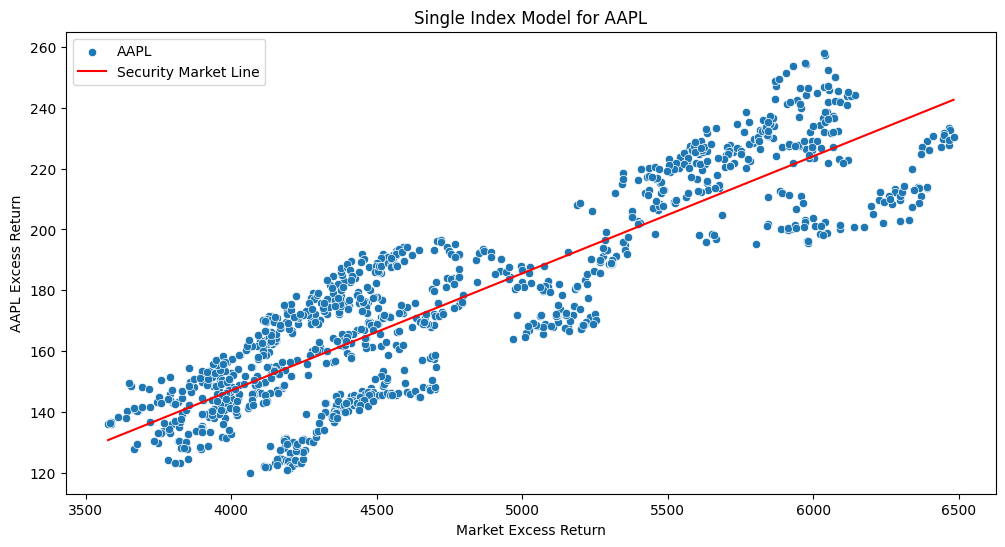

Single Index Model for: GOOGL
Excess Returns for Historical Stock Data: Date
2021-04-22    111.945367
2021-04-23    114.301736
2021-04-26    114.798761
2021-04-27    113.856912
2021-04-28    117.239625
                 ...    
2025-08-21    199.740800
2025-08-22    206.080796
2025-08-25    208.480805
2025-08-26    207.130799
2025-08-27    207.470796
Name: GOOGL, Length: 1093, dtype: float64
Market Excess Return: Date
2021-04-22    4134.970780
2021-04-23    4180.160722
2021-04-26    4187.610917
2021-04-27    4186.711015
2021-04-28    4183.170976
                 ...     
2025-08-21    6370.160722
2025-08-22    6466.900956
2025-08-25    6439.310624
2025-08-26    6465.930741
2025-08-27    6481.390702
Name: ^GSPC, Length: 1093, dtype: float64
Standard Deviation of Excess Returns: 28.836430655187655
                            OLS Regression Results                            
Dep. Variable:                  GOOGL   R-squared:                       0.885
Model:                            OL

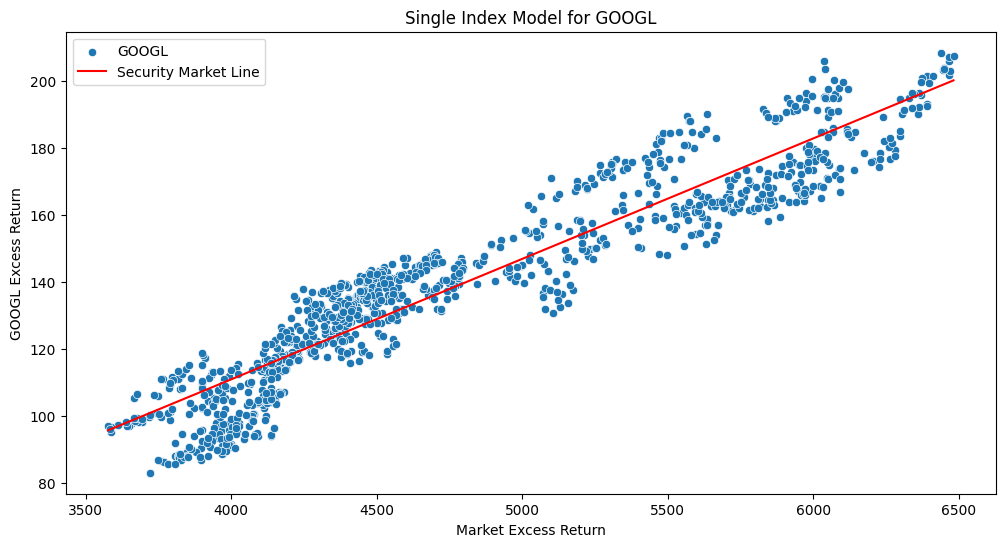

Single Index Model for: META
Excess Returns for Historical Stock Data: Date
2021-04-22    294.892961
2021-04-23    299.477861
2021-04-26    301.377366
2021-04-27    301.904466
2021-04-28    305.415208
                 ...    
2025-08-21    739.090776
2025-08-22    754.780778
2025-08-25    753.290788
2025-08-26    754.090776
2025-08-27    747.370805
Name: META, Length: 1093, dtype: float64
Market Excess Return: Date
2021-04-22    4134.970780
2021-04-23    4180.160722
2021-04-26    4187.610917
2021-04-27    4186.711015
2021-04-28    4183.170976
                 ...     
2025-08-21    6370.160722
2025-08-22    6466.900956
2025-08-25    6439.310624
2025-08-26    6465.930741
2025-08-27    6481.390702
Name: ^GSPC, Length: 1093, dtype: float64
Standard Deviation of Excess Returns: 177.04135105237276
                            OLS Regression Results                            
Dep. Variable:                   META   R-squared:                       0.937
Model:                            OLS 

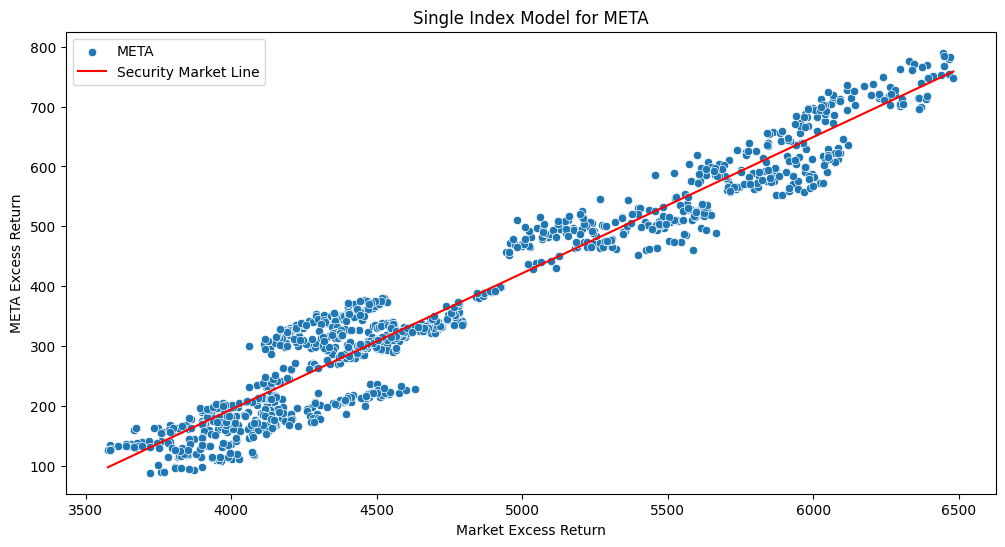

Single Index Model for: TSLA
Excess Returns for Historical Stock Data: Date
2021-04-22    239.887467
2021-04-23    243.124131
2021-04-26    246.057466
2021-04-27    234.904130
2021-04-28    231.457460
                 ...    
2025-08-21    320.100785
2025-08-22    340.000810
2025-08-25    346.590806
2025-08-26    351.660813
2025-08-27    349.590806
Name: TSLA, Length: 1093, dtype: float64
Market Excess Return: Date
2021-04-22    4134.970780
2021-04-23    4180.160722
2021-04-26    4187.610917
2021-04-27    4186.711015
2021-04-28    4183.170976
                 ...     
2025-08-21    6370.160722
2025-08-22    6466.900956
2025-08-25    6439.310624
2025-08-26    6465.930741
2025-08-27    6481.390702
Name: ^GSPC, Length: 1093, dtype: float64
Standard Deviation of Excess Returns: 66.07187793940413
                            OLS Regression Results                            
Dep. Variable:                   TSLA   R-squared:                       0.191
Model:                            OLS  

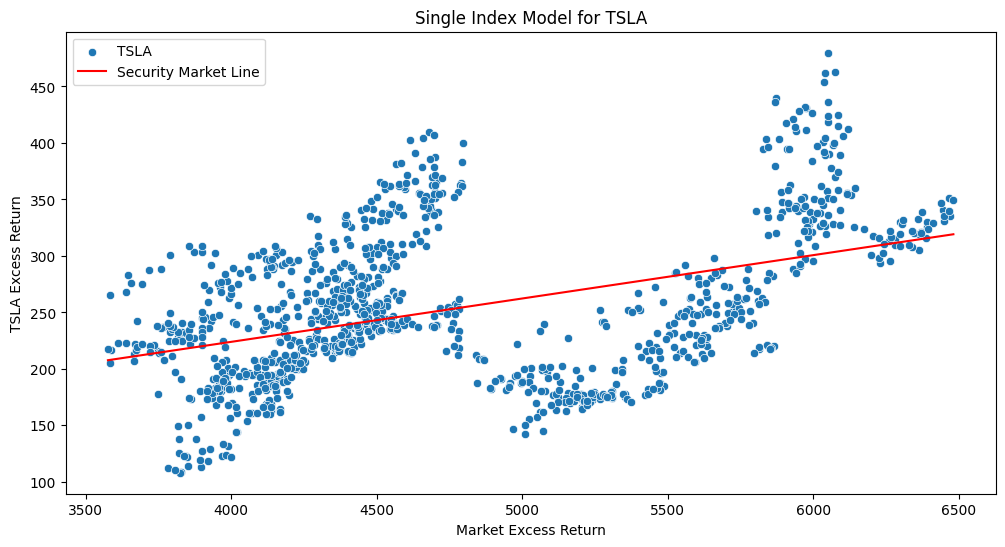

Single Index Model for: TGT
Excess Returns for Historical Stock Data: Date
2021-04-22    181.816331
2021-04-23    182.205445
2021-04-26    180.100389
2021-04-27    180.746049
2021-04-28    180.834519
                 ...    
2025-08-21     97.050798
2025-08-22     99.230798
2025-08-25     97.120797
2025-08-26     96.100801
2025-08-27     97.950799
Name: TGT, Length: 1093, dtype: float64
Market Excess Return: Date
2021-04-22    4134.970780
2021-04-23    4180.160722
2021-04-26    4187.610917
2021-04-27    4186.711015
2021-04-28    4183.170976
                 ...     
2025-08-21    6370.160722
2025-08-22    6466.900956
2025-08-25    6439.310624
2025-08-26    6465.930741
2025-08-27    6481.390702
Name: ^GSPC, Length: 1093, dtype: float64
Standard Deviation of Excess Returns: 37.75232780422732
                            OLS Regression Results                            
Dep. Variable:                    TGT   R-squared:                       0.141
Model:                            OLS   A

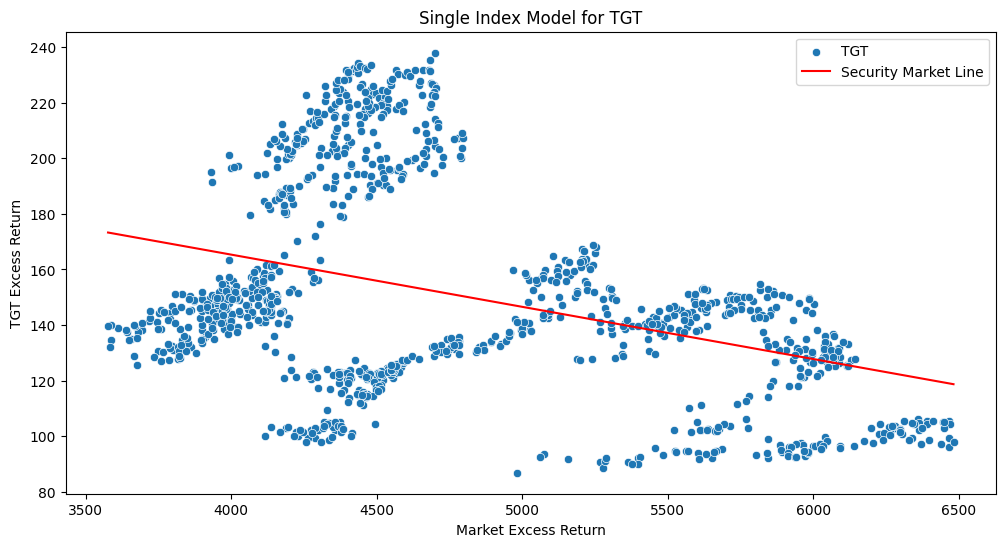

Single Index Model for: SBUX
Excess Returns for Historical Stock Data: Date
2021-04-22    104.758767
2021-04-23    106.240975
2021-04-26    104.758767
2021-04-27    104.966653
2021-04-28    101.577394
                 ...    
2025-08-21     88.550798
2025-08-22     88.370797
2025-08-25     85.800798
2025-08-26     86.620797
2025-08-27     87.650804
Name: SBUX, Length: 1093, dtype: float64
Market Excess Return: Date
2021-04-22    4134.970780
2021-04-23    4180.160722
2021-04-26    4187.610917
2021-04-27    4186.711015
2021-04-28    4183.170976
                 ...     
2025-08-21    6370.160722
2025-08-22    6466.900956
2025-08-25    6439.310624
2025-08-26    6465.930741
2025-08-27    6481.390702
Name: ^GSPC, Length: 1093, dtype: float64
Standard Deviation of Excess Returns: 10.537156537703684
                            OLS Regression Results                            
Dep. Variable:                   SBUX   R-squared:                       0.003
Model:                            OLS 

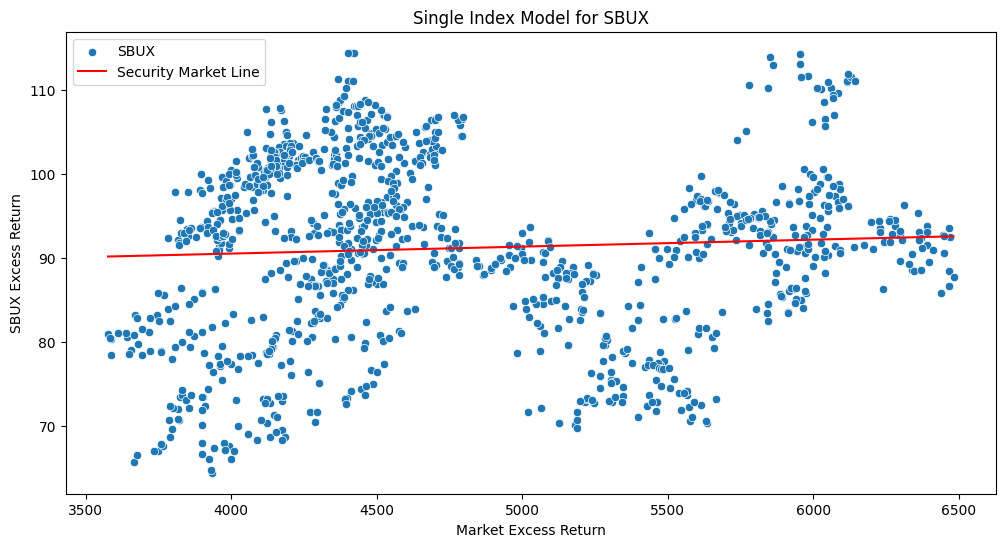

Single Index Model for: WBA
Excess Returns for Historical Stock Data: Date
2021-04-22    42.131967
2021-04-23    42.484613
2021-04-26    42.252191
2021-04-27    42.075872
2021-04-28    41.987706
                ...    
2025-08-21    12.180800
2025-08-22    12.060800
2025-08-25    11.960800
2025-08-26    11.910800
2025-08-27    11.970800
Name: WBA, Length: 1093, dtype: float64
Market Excess Return: Date
2021-04-22    4134.970780
2021-04-23    4180.160722
2021-04-26    4187.610917
2021-04-27    4186.711015
2021-04-28    4183.170976
                 ...     
2025-08-21    6370.160722
2025-08-22    6466.900956
2025-08-25    6439.310624
2025-08-26    6465.930741
2025-08-27    6481.390702
Name: ^GSPC, Length: 1093, dtype: float64
Standard Deviation of Excess Returns: 11.594532293171387
                            OLS Regression Results                            
Dep. Variable:                    WBA   R-squared:                       0.628
Model:                            OLS   Adj. R-squa

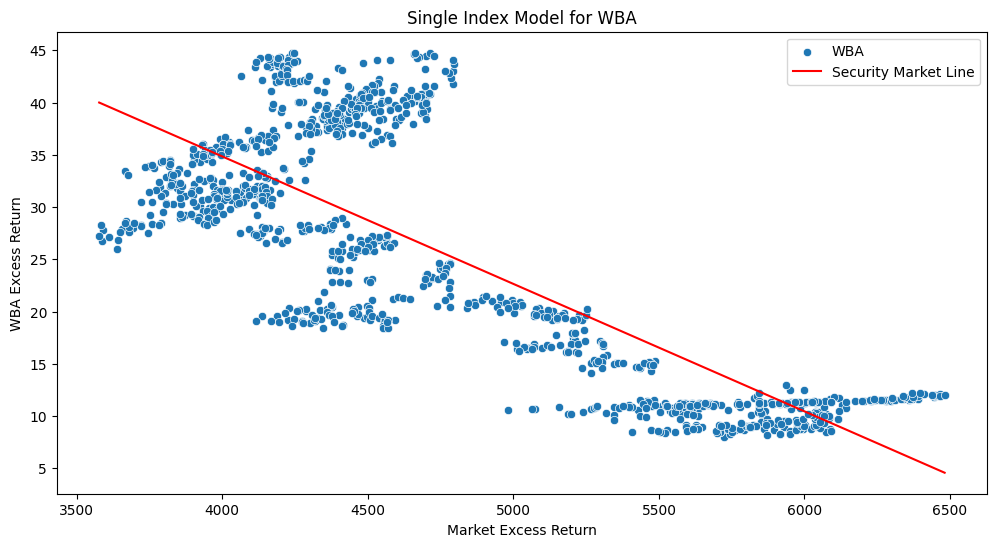

Single Index Model for: RGTI
Excess Returns for Historical Stock Data: Date
2021-04-22     9.8908
2021-04-23     9.9008
2021-04-26     9.9008
2021-04-27     9.9008
2021-04-28     9.9008
               ...   
2025-08-21    14.2608
2025-08-22    14.8108
2025-08-25    14.4608
2025-08-26    15.2908
2025-08-27    15.3808
Name: RGTI, Length: 1093, dtype: float64
Market Excess Return: Date
2021-04-22    4134.970780
2021-04-23    4180.160722
2021-04-26    4187.610917
2021-04-27    4186.711015
2021-04-28    4183.170976
                 ...     
2025-08-21    6370.160722
2025-08-22    6466.900956
2025-08-25    6439.310624
2025-08-26    6465.930741
2025-08-27    6481.390702
Name: ^GSPC, Length: 1093, dtype: float64
Standard Deviation of Excess Returns: 4.649726749213395
                            OLS Regression Results                            
Dep. Variable:                   RGTI   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                 

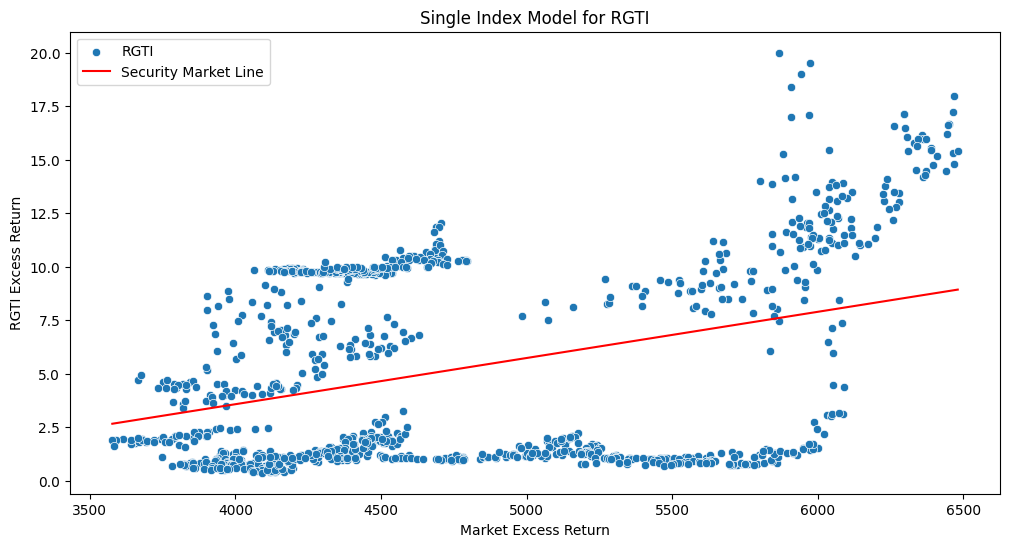

Single Index Model for: BLCN
Excess Returns for Historical Stock Data: Date
2021-04-22    46.447179
2021-04-23    46.981717
2021-04-26    47.283006
2021-04-27    47.321885
2021-04-28    47.380189
                ...    
2025-08-21    23.280801
2025-08-22    23.825799
2025-08-25    23.790799
2025-08-26    23.585799
2025-08-27    23.735801
Name: BLCN, Length: 1093, dtype: float64
Market Excess Return: Date
2021-04-22    4134.970780
2021-04-23    4180.160722
2021-04-26    4187.610917
2021-04-27    4186.711015
2021-04-28    4183.170976
                 ...     
2025-08-21    6370.160722
2025-08-22    6466.900956
2025-08-25    6439.310624
2025-08-26    6465.930741
2025-08-27    6481.390702
Name: ^GSPC, Length: 1093, dtype: float64
Standard Deviation of Excess Returns: 8.868129620413795
                            OLS Regression Results                            
Dep. Variable:                   BLCN   R-squared:                       0.023
Model:                            OLS   Adj. R-squ

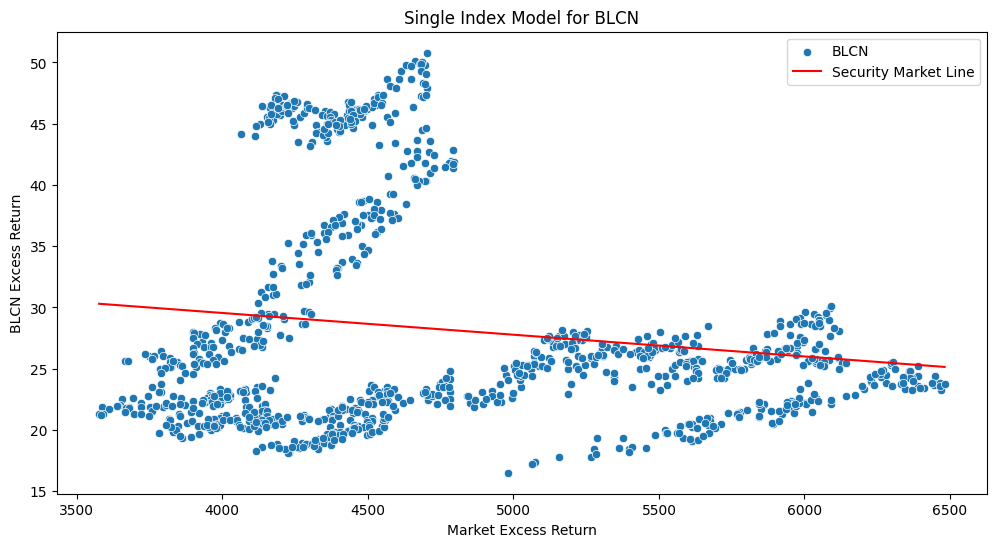

Single Index Model for: WMT
Excess Returns for Historical Stock Data: Date
2021-04-22    43.759530
2021-04-23    43.831605
2021-04-26    43.207997
2021-04-27    43.355271
2021-04-28    43.201726
                ...    
2025-08-21    97.950799
2025-08-22    96.820802
2025-08-25    96.060800
2025-08-26    96.040803
2025-08-27    96.070802
Name: WMT, Length: 1093, dtype: float64
Market Excess Return: Date
2021-04-22    4134.970780
2021-04-23    4180.160722
2021-04-26    4187.610917
2021-04-27    4186.711015
2021-04-28    4183.170976
                 ...     
2025-08-21    6370.160722
2025-08-22    6466.900956
2025-08-25    6439.310624
2025-08-26    6465.930741
2025-08-27    6481.390702
Name: ^GSPC, Length: 1093, dtype: float64
Standard Deviation of Excess Returns: 19.05233457385953
                            OLS Regression Results                            
Dep. Variable:                    WMT   R-squared:                       0.868
Model:                            OLS   Adj. R-squar

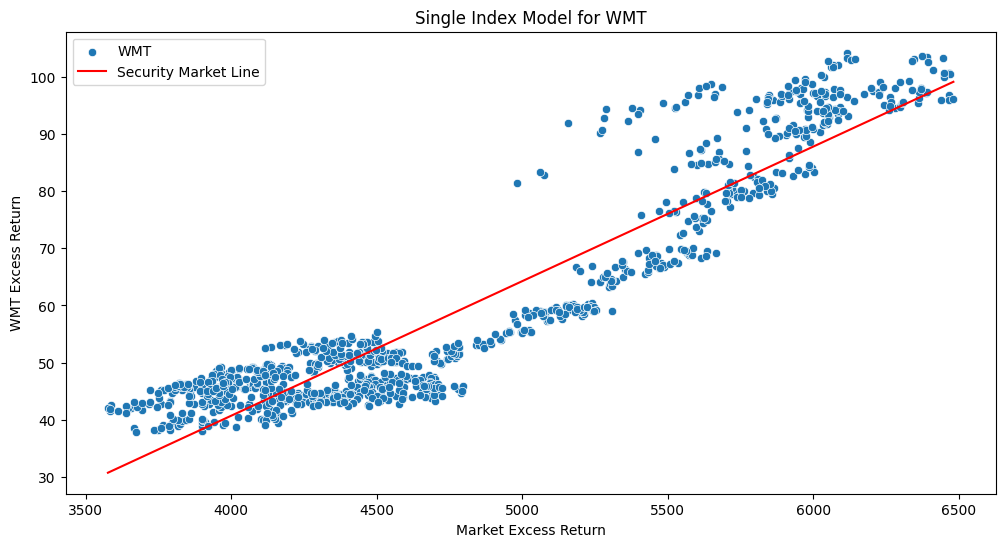

Single Index Model for: F
Excess Returns for Historical Stock Data: Date
2021-04-22     9.155066
2021-04-23     9.369973
2021-04-26     9.408349
2021-04-27     9.577206
2021-04-28     9.531154
                ...    
2025-08-21    11.320800
2025-08-22    11.730800
2025-08-25    11.810800
2025-08-26    11.830800
2025-08-27    11.900800
Name: F, Length: 1093, dtype: float64
Market Excess Return: Date
2021-04-22    4134.970780
2021-04-23    4180.160722
2021-04-26    4187.610917
2021-04-27    4186.711015
2021-04-28    4183.170976
                 ...     
2025-08-21    6370.160722
2025-08-22    6466.900956
2025-08-25    6439.310624
2025-08-26    6465.930741
2025-08-27    6481.390702
Name: ^GSPC, Length: 1093, dtype: float64
Standard Deviation of Excess Returns: 1.6955215109086033
                            OLS Regression Results                            
Dep. Variable:                      F   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:

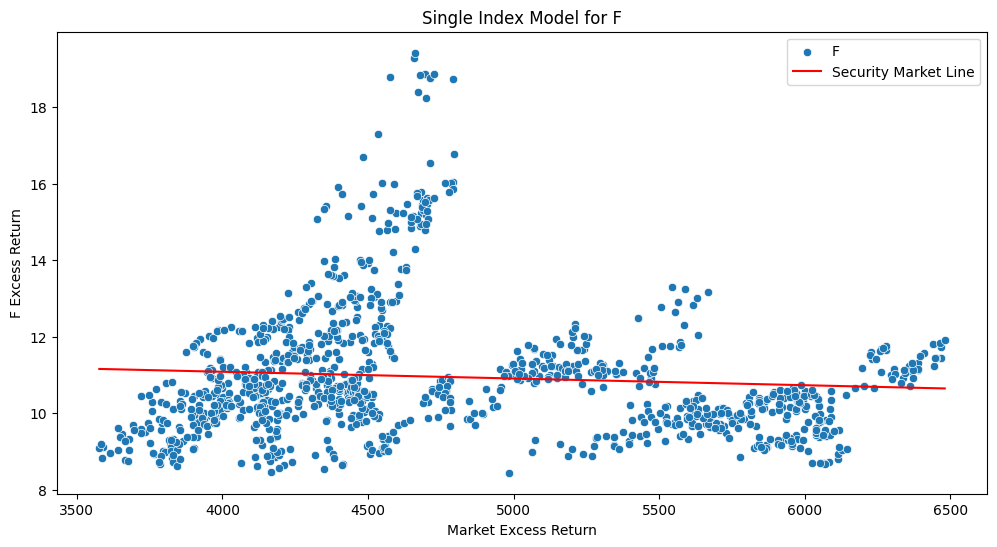

Single Index Model for: IBM
Excess Returns for Historical Stock Data: Date
2021-04-22    111.885491
2021-04-23    112.796289
2021-04-26    112.115159
2021-04-27    112.463639
2021-04-28    113.247727
                 ...    
2025-08-21    239.390794
2025-08-22    242.080796
2025-08-25    239.420793
2025-08-26    242.620805
2025-08-27    244.830796
Name: IBM, Length: 1093, dtype: float64
Market Excess Return: Date
2021-04-22    4134.970780
2021-04-23    4180.160722
2021-04-26    4187.610917
2021-04-27    4186.711015
2021-04-28    4183.170976
                 ...     
2025-08-21    6370.160722
2025-08-22    6466.900956
2025-08-25    6439.310624
2025-08-26    6465.930741
2025-08-27    6481.390702
Name: ^GSPC, Length: 1093, dtype: float64
Standard Deviation of Excess Returns: 51.24499495573995
                            OLS Regression Results                            
Dep. Variable:                    IBM   R-squared:                       0.826
Model:                            OLS   A

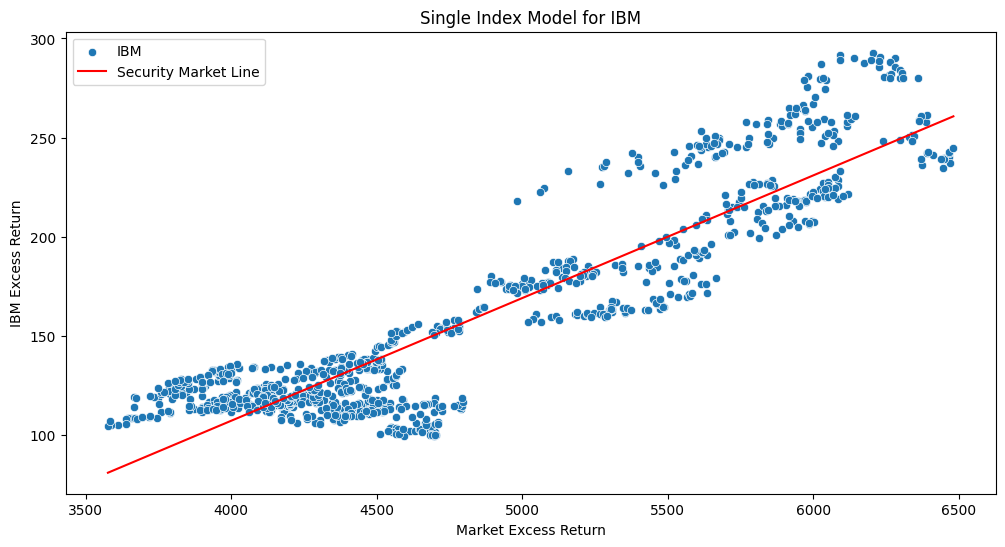

Single Index Model for: MCD
Excess Returns for Historical Stock Data: Date
2021-04-22    211.542436
2021-04-23    213.013581
2021-04-26    210.952149
2021-04-27    213.376832
2021-04-28    211.042985
                 ...    
2025-08-21    313.210801
2025-08-22    314.060807
2025-08-25    313.430802
2025-08-26    312.930802
2025-08-27    311.420793
Name: MCD, Length: 1093, dtype: float64
Market Excess Return: Date
2021-04-22    4134.970780
2021-04-23    4180.160722
2021-04-26    4187.610917
2021-04-27    4186.711015
2021-04-28    4183.170976
                 ...     
2025-08-21    6370.160722
2025-08-22    6466.900956
2025-08-25    6439.310624
2025-08-26    6465.930741
2025-08-27    6481.390702
Name: ^GSPC, Length: 1093, dtype: float64
Standard Deviation of Excess Returns: 29.346103426775347
                            OLS Regression Results                            
Dep. Variable:                    MCD   R-squared:                       0.508
Model:                            OLS   

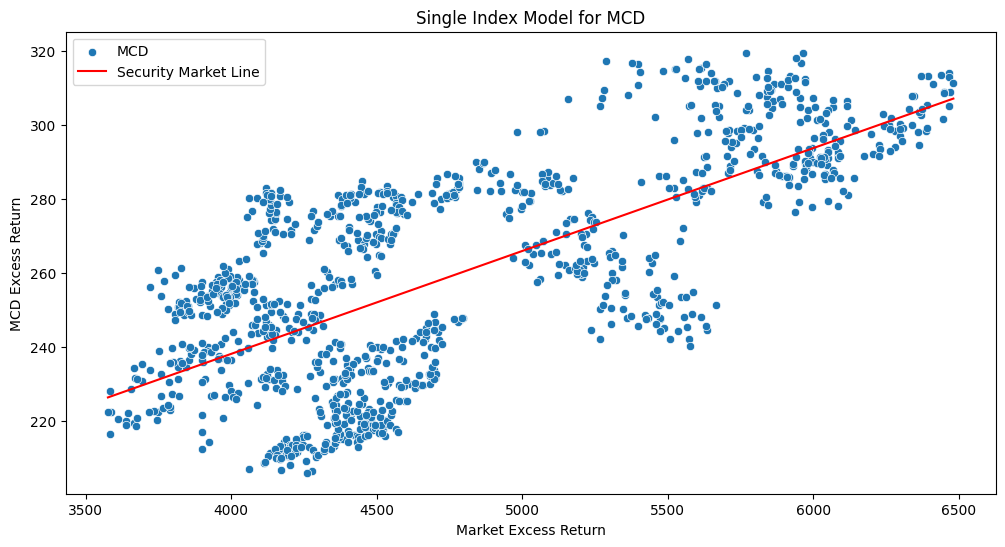

Single Index Model for: GM
Excess Returns for Historical Stock Data: Date
2021-04-22    54.908975
2021-04-23    55.752229
2021-04-26    56.411325
2021-04-27    57.147966
2021-04-28    56.740876
                ...    
2025-08-21    56.500798
2025-08-22    58.360799
2025-08-25    58.270799
2025-08-26    58.790799
2025-08-27    58.740800
Name: GM, Length: 1093, dtype: float64
Market Excess Return: Date
2021-04-22    4134.970780
2021-04-23    4180.160722
2021-04-26    4187.610917
2021-04-27    4186.711015
2021-04-28    4183.170976
                 ...     
2025-08-21    6370.160722
2025-08-22    6466.900956
2025-08-25    6439.310624
2025-08-26    6465.930741
2025-08-27    6481.390702
Name: ^GSPC, Length: 1093, dtype: float64
Standard Deviation of Excess Returns: 8.77582082389337
                            OLS Regression Results                            
Dep. Variable:                     GM   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:

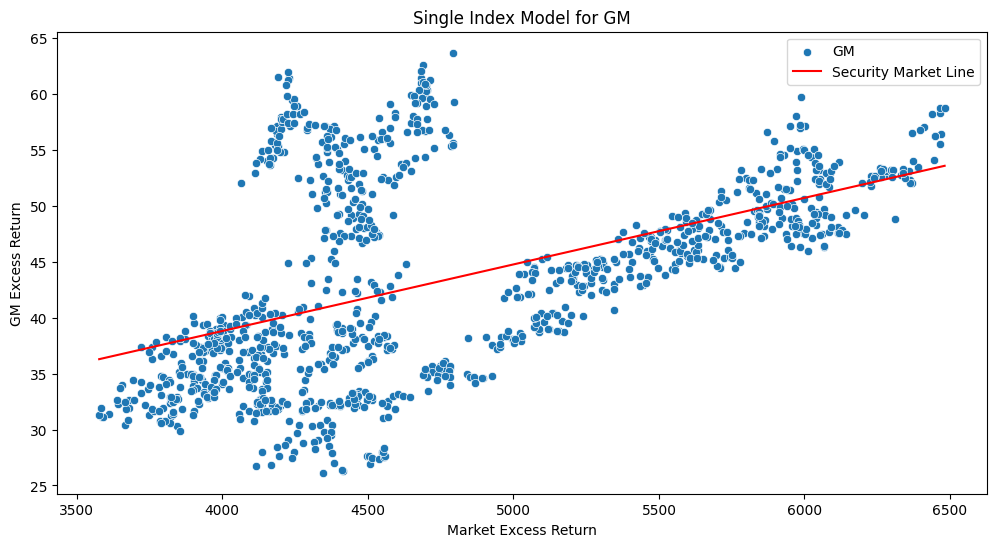

Single Index Model for: VZ
Excess Returns for Historical Stock Data: Date
2021-04-22    44.103829
2021-04-23    44.119233
2021-04-26    43.841992
2021-04-27    43.364507
2021-04-28    43.449227
                ...    
2025-08-21    45.020799
2025-08-22    44.430799
2025-08-25    44.220800
2025-08-26    43.950799
2025-08-27    44.260800
Name: VZ, Length: 1093, dtype: float64
Market Excess Return: Date
2021-04-22    4134.970780
2021-04-23    4180.160722
2021-04-26    4187.610917
2021-04-27    4186.711015
2021-04-28    4183.170976
                 ...     
2025-08-21    6370.160722
2025-08-22    6466.900956
2025-08-25    6439.310624
2025-08-26    6465.930741
2025-08-27    6481.390702
Name: ^GSPC, Length: 1093, dtype: float64
Standard Deviation of Excess Returns: 4.7824165304694395
                            OLS Regression Results                            
Dep. Variable:                     VZ   R-squared:                       0.172
Model:                            OLS   Adj. R-square

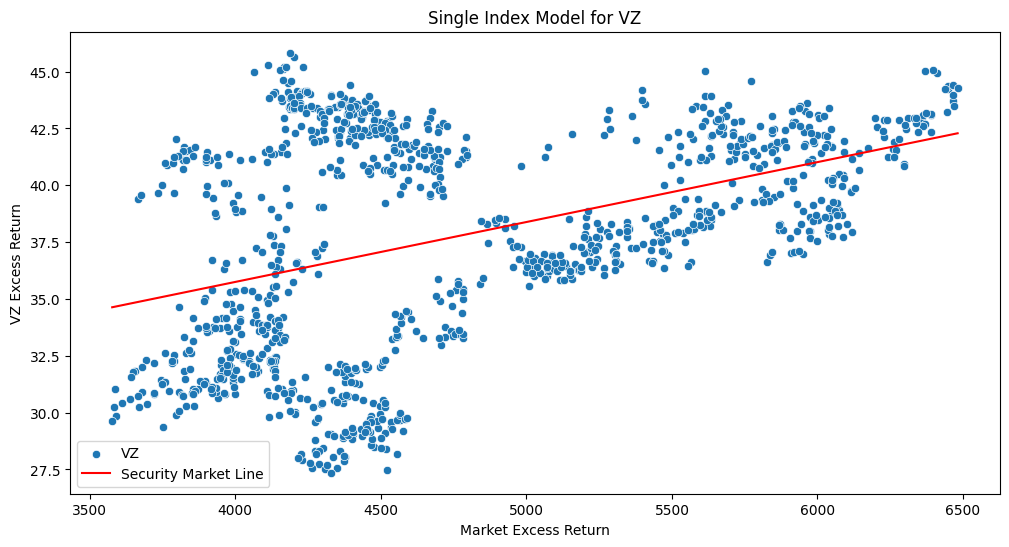

Single Index Model for: T
Excess Returns for Historical Stock Data: Date
2021-04-22    17.897414
2021-04-23    17.920259
2021-04-26    17.640464
2021-04-27    17.560527
2021-04-28    17.669021
                ...    
2025-08-21    29.430801
2025-08-22    28.760800
2025-08-25    28.730800
2025-08-26    28.550799
2025-08-27    29.050799
Name: T, Length: 1093, dtype: float64
Market Excess Return: Date
2021-04-22    4134.970780
2021-04-23    4180.160722
2021-04-26    4187.610917
2021-04-27    4186.711015
2021-04-28    4183.170976
                 ...     
2025-08-21    6370.160722
2025-08-22    6466.900956
2025-08-25    6439.310624
2025-08-26    6465.930741
2025-08-27    6481.390702
Name: ^GSPC, Length: 1093, dtype: float64
Standard Deviation of Excess Returns: 4.260566371928902
                            OLS Regression Results                            
Dep. Variable:                      T   R-squared:                       0.620
Model:                            OLS   Adj. R-squared: 

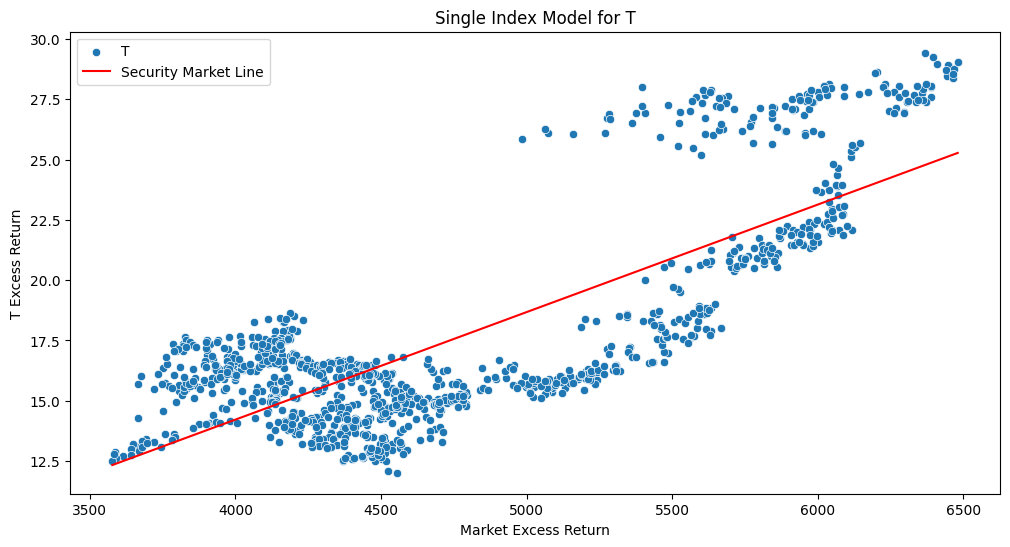

In [2]:
if __name__ == "__main__":
    config = load_config()
    sim_config = Sim(config)
    sim_config.single_index_model()